In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [5]:
image_shape

(87, 65)

In [8]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [12]:
people.images.shape, len(people.target_names)

((3023, 87, 65), 62)

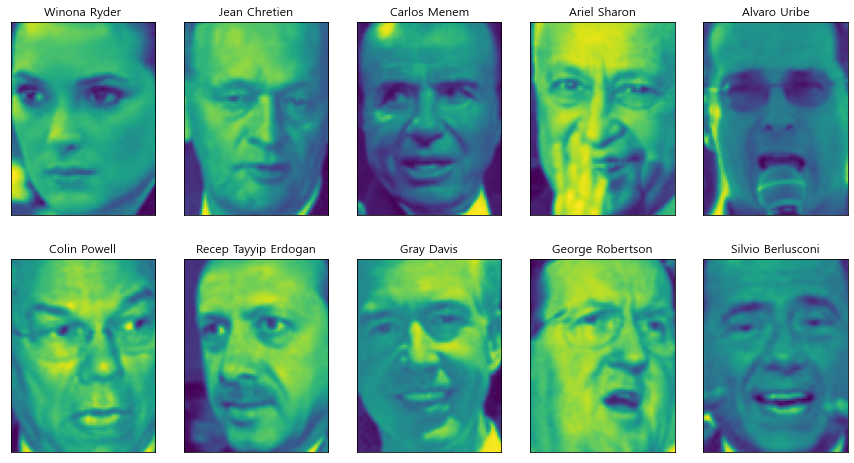

In [10]:
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [13]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1

x_people = people.data[mask]
y_people = people.target[mask]

# 흑백 이미지는 0~255 픽셀값을 가짐
# 스케일 조정 : 0~1 사이
x_people = x_people / 255

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.score(x_test, y_test)

0.2189922480620155

In [41]:
pca = PCA(n_components=50, whiten=True, random_state=0)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [42]:
x_train_pca.shape, x_test_pca.shape

((1547, 50), (516, 50))

In [43]:
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)
knn.score(x_test_pca, y_test)

0.2616279069767442

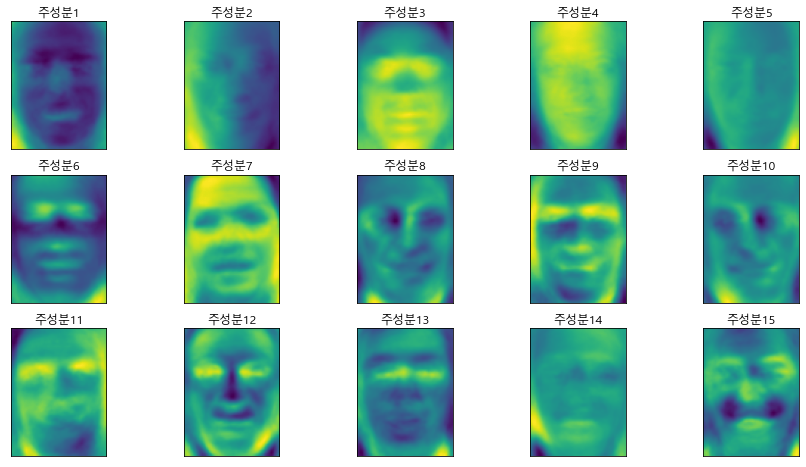

In [46]:
fig, axes = plt.subplots(3,5,figsize=(15,8), subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분{}'.format(i+1))